# Import models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LinearRegression

from sklearn.tree import  DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import  ElasticNet
from sklearn.metrics import mean_squared_error

from bayes_opt import BayesianOptimization




C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read Data
For convenience, the dataset was saved to a csv file after cleaninig and data wrangling phase.

In [2]:
df=pd.read_csv("clean_data.csv")
#df=df[df.yearOfRegistration>1990]
#df=df[df.price<150000]
df.price.describe()

In [115]:
np.exp(y).describe()

count    2.311570e+05
mean     6.894628e+03
std      1.055829e+04
min      2.000000e+02
25%      1.700000e+03
50%      4.000000e+03
75%      8.900000e+03
max      1.250000e+06
Name: price, dtype: float64

# Create Dummies

In [3]:

df=df.drop('Unnamed: 0',axis=1)
df=df.drop('index',axis=1)
fuel_dummies=pd.get_dummies(df.fuelType, prefix='fuel').iloc[:,1:]
#df=pd.concat([df,fuel_dummies], axis=1)
brand_dummies=pd.get_dummies(df.brand, prefix='brand').iloc[:,1:]

vehicle_dummies=pd.get_dummies(df.vehicleType, prefix='vehicle_type').iloc[:,1:]
#df=pd.concat([df,vehicle_dummies], axis=1)
df=pd.concat([df,fuel_dummies,vehicle_dummies,brand_dummies], axis=1)
dfcolumns=['yearOfRegistration','powerPS','kilometer',
         'age','salvaged','gearbox',
         'fuel_1', 'fuel_2', 'fuel_3', 'fuel_4', 'fuel_5', 
           'brand_AUDI',
       'brand_BENTLEY', 'brand_BMW', 'brand_BUICK', 'brand_CADILLAC',
       'brand_CHEVROLET', 'brand_CHRYSLER', 'brand_CITROEN', 'brand_DACIA',
       'brand_DAEWOO', 'brand_DAIHATSU', 'brand_DODGE', 'brand_FERRARI',
       'brand_FIAT', 'brand_FORD', 'brand_GMC', 'brand_HONDA', 'brand_HUMMER',
       'brand_HYUNDAI', 'brand_ISUZU', 'brand_IVECO', 'brand_JAGUAR',
       'brand_JEEP', 'brand_KIA', 'brand_LADA', 'brand_LANCIA',
       'brand_LAND_ROVER', 'brand_LEXUS', 'brand_LINCOLN', 'brand_LOTUS',
       'brand_MASERATI', 'brand_MAZDA', 'brand_MERCEDES_BENZ', 'brand_MG',
       'brand_MINI', 'brand_MITSUBISHI', 'brand_NISSAN', 'brand_OLDSMOBILE',
       'brand_OPEL', 'brand_PEUGEOT', 'brand_PONTIAC', 'brand_PORSCHE',
       'brand_RENAULT', 'brand_ROVER', 'brand_SAAB', 'brand_SEAT',
       'brand_SKODA', 'brand_SMART', 'brand_SUBARU', 'brand_SUZUKI',
       'brand_TOYOTA', 'brand_TRABANT', 
          'brand_TRIUMPH', 
           'brand_VOLKSWAGEN',
       'brand_VOLVO',
           'vehicle_type_bus', 'vehicle_type_cabrio',
       'vehicle_type_coupe', 'vehicle_type_kleinwagen', 'vehicle_type_kombi',
       'vehicle_type_limousine', 'vehicle_type_suv']

# Split Data

Log trasformation was applied to price column before splitting

In [4]:
X=df[dfcolumns]
y=np.log(df.price)

Xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)


# Tree Regressor with 5-Fold CV

In [5]:
# Define the grid of hyperparameters 'params_dt'
clf=DecisionTreeRegressor(criterion='friedman_mse', max_depth=52, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.2,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0,
           presort=False, random_state=42, splitter='best')



params_clf = { 'criterion' : ["friedman_mse"],
               'max_depth': [21],
               #'min_samples_split' : [2,3,4]
               'min_samples_leaf': [7],
              # 'min_weight_fraction_leaf':[0],
              'max_leaf_nodes':[None],
              'random_state':[42],
              'max_features': ['auto'],
              
              'min_impurity_decrease':[0.6]
              
              
             }
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_clf = GridSearchCV(estimator=DecisionTreeRegressor(), 
                        param_grid=params_clf,
                        scoring='r2', 
                        cv=5,
                        n_jobs=-1)

grid_clf.fit(Xtrain, ytrain)
ypred=grid_clf.predict(xtest)
grid_clf.best_params_
grid_clf.score(xtest,ytest)

0.8796082602485308

In [6]:
rmse_test = MSE(ytest,ypred)**(0.5)
print(np.exp(rmse_test))

1.4687183936394324


In [7]:
clf.fit(Xtrain,ytrain)
clf.predict(xtest)
clf.score(xtest,ytest)

0.8730656809263285

# Random Forest Regressor

In [10]:
rf1=RandomForestRegressor(random_state=42,n_jobs=-1)

params_rf = {'n_estimators':[300],
                'max_features':[ 'auto'],
               'min_samples_leaf':[2],
                'max_depth':[41],
                }


# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf1,
                       param_grid=params_rf,
                       scoring='r2',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


grid_rf.fit(Xtrain, ytrain) 

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
ypred = best_model.predict(xtest)

# Compute rmse_test
rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_rf.best_score_)) 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.2min finished


Test RMSE of best model: 0.357
Best score: 0.893


In [117]:
np.exp(0.357)

1.429035869853877

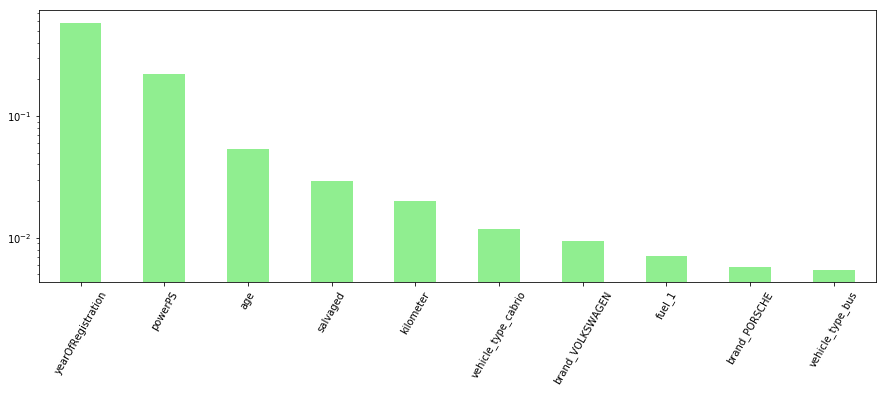

In [25]:
importances = pd.Series(data=grid_rf.best_estimator_.feature_importances_,
                        index= dfcolumns)

# Sort importances
importances_sorted = importances.sort_values(ascending=False)[:10]
g=importances_sorted.plot(kind='bar', color='lightgreen',figsize=(15,5),rot=60,logy=True)

#plt.title('Features Importances')
#print('Score: %.2f' % rf.score(xtest, rf_pred))

# Gradient Boosting Regressor

In [26]:
gbt = GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=42,
             subsample=1.00, verbose=1, warm_start=False)
                                       
gbt.fit(Xtrain,ytrain)
gbt_pred=gbt.predict(xtest)
stats.pearsonr(gbt_pred, ytest) 
rmse_test = MSE(ytest,gbt_pred)**(0.5)
rmse_test

      Iter       Train Loss   Remaining Time 
         1           0.8675           13.71m
         2           0.6248           13.63m
         3           0.4671           13.86m
         4           0.3624           13.87m
         5           0.2926           13.65m
         6           0.2458           13.48m
         7           0.2135           13.25m
         8           0.1907           12.97m
         9           0.1746           12.74m
        10           0.1638           12.46m
        20           0.1291           10.58m
        30           0.1221            8.87m
        40           0.1187            7.70m
        50           0.1160            6.79m
        60           0.1140            6.04m
        70           0.1117            5.57m
        80           0.1099            5.09m
        90           0.1083            4.66m
       100           0.1072            4.25m
       200           0.0949            1.32m


0.3485516456633321

In [27]:
gbt.score(xtest,ytest)

0.9010111227839658

In [116]:
np.exp(0.3485516456633321)

1.4170137236473919

# Random Forest Regressor with Bagging

In [114]:
from sklearn.model_selection import KFold
rf=RandomForestRegressor()


test_preds = np.zeros(ytest.shape[0])

kf = KFold(n_splits=20, shuffle=True,  random_state=1234)

for i, (train_index, val_index) in enumerate(kf.split(Xtrain,ytrain)):
    X_train, y_train = Xtrain.iloc[train_index].copy(), ytrain.iloc[train_index].copy()
    X_valid, y_valid = Xtrain.iloc[val_index].copy(), ytrain.iloc[val_index].copy()
    print("\nFold ", i)
    rf.fit(X_train, y_train)
    val_preds = rf.predict(X_valid)
    print('Validation RMSE Score:',MSE(y_valid,val_preds)**(0.5))
    test_pred = rf.predict(xtest)
    print('Test RMSE Score:',MSE(ytest,test_preds)**(0.5))
    test_preds += test_pred / kf.n_splits
    print('Bagged Test RMSE Score:',MSE(ytest,test_preds)**(0.5))


Fold  0
Validation RMSE Score: 0.3874439138218598
Test RMSE Score: 8.33438678687052
Bagged Test RMSE Score: 7.9184322219019085

Fold  1
Validation RMSE Score: 0.3803403968257797
Test RMSE Score: 7.9184322219019085
Bagged Test RMSE Score: 7.50255466120545

Fold  2
Validation RMSE Score: 0.37389965766495814
Test RMSE Score: 7.50255466120545
Bagged Test RMSE Score: 7.086717746633361

Fold  3
Validation RMSE Score: 0.3732085984356836
Test RMSE Score: 7.086717746633361
Bagged Test RMSE Score: 6.670909516055026

Fold  4
Validation RMSE Score: 0.37817565956697224
Test RMSE Score: 6.670909516055026
Bagged Test RMSE Score: 6.255230672675329

Fold  5
Validation RMSE Score: 0.3790491776461975
Test RMSE Score: 6.255230672675329
Bagged Test RMSE Score: 5.8396186986112495

Fold  6
Validation RMSE Score: 0.36539920350655897
Test RMSE Score: 5.8396186986112495
Bagged Test RMSE Score: 5.424162062016891

Fold  7
Validation RMSE Score: 0.3672169744849822
Test RMSE Score: 5.424162062016891
Bagged Test RM

In [29]:
np.exp(y).describe()

count    2.311570e+05
mean     6.894628e+03
std      1.055829e+04
min      2.000000e+02
25%      1.700000e+03
50%      4.000000e+03
75%      8.900000e+03
max      1.250000e+06
Name: price, dtype: float64

# Light GBM

In [37]:
import lightgbm as lgb

#lgbm=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#       importance_type='split',min_child_samples=20, min_child_weight=0.001,
#                       min_split_gain=0.0,n_jobs=-1, objective=None,
#       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
#

lgbr=lgb.LGBMRegressor()



param_dist = {  "max_depth":[75], "learning_rate" : [0.1],
         "num_leaves": [300],"n_estimators": [200]}
                  
              
              
             
grid_search = GridSearchCV(lgbr, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="r2", verbose=5)
grid_search.fit(Xtrain,ytrain)
grid_search.best_estimator_
lgb_pred=grid_search.predict(xtest)
#d_train = lgb.Dataset(Xtrain, label=ytrain)
#params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}
rmse_test = MSE(ytest,lgb_pred)**(0.5)
print(rmse_test)
print(grid_search.best_estimator_.score(xtest,ytest))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.2s finished


0.3452056223634312
0.902902545627689


In [36]:
grid_search.best_estimator_.score(xtest,ytest)


0.902902545627689

In [33]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 75, 'n_estimators': 200, 'num_leaves': 300}

In [121]:
np.exp(0.3452056223634312)

1.4122802862239878

# Catboost Regressor

Catboost does not require dummy variables or one hot encoding. Therefore, dataset was adjusted accordingly.

In [38]:
###
###       CATBOOST REGRESSOR
###
###
from catboost import CatBoostRegressor
df=pd.read_csv("clean_data.csv")

df=df.drop('Unnamed: 0',axis=1)
df=df.drop('index',axis=1)
y3=np.log(df.price)
df = df.iloc[:,5:].copy()


X_train, X_test, y_train, y_test = train_test_split(df, y3, test_size = 0.2)
categorical_feature_indices = [0,1,2,5,6,7,8,9]



In [39]:
cb = CatBoostRegressor()

categorical_feature_indices = [0,1,2,5,6,7,8,9]

param_cb = {  "iterations":[500], "learning_rate" : [0.2],
         "leaf_reg": [1],"depth": [12]}
                  
              
              
             
grid_search = GridSearchCV(cb, n_jobs=-1, param_grid=param_cb, cv = 5, scoring="r2", verbose=5)
grid_search.fit(X_train, y_train,cat_features=categorical_feature_indices,  eval_set = (X_test,y_test))
cb_pred=grid_search.best_estimator_.predict(X_test)
grid_search.best_estimator_
rmse_test = MSE(y_test,cb_pred)**(0.5)
rmse_test

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.8min remaining: 25.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.1min finished


0:	learn: 6.6882813	test: 6.6873288	best: 6.6873288 (0)	total: 683ms	remaining: 5m 41s
1:	learn: 5.3652097	test: 5.3644723	best: 5.3644723 (1)	total: 949ms	remaining: 3m 56s
2:	learn: 4.3140324	test: 4.3126995	best: 4.3126995 (2)	total: 1.02s	remaining: 2m 49s
3:	learn: 3.4679885	test: 3.4665891	best: 3.4665891 (3)	total: 1.29s	remaining: 2m 40s
4:	learn: 2.7944692	test: 2.7930877	best: 2.7930877 (4)	total: 1.47s	remaining: 2m 25s
5:	learn: 2.2586654	test: 2.2574884	best: 2.2574884 (5)	total: 1.84s	remaining: 2m 31s
6:	learn: 1.8341985	test: 1.8331110	best: 1.8331110 (6)	total: 2.35s	remaining: 2m 45s
7:	learn: 1.4985842	test: 1.4974994	best: 1.4974994 (7)	total: 2.62s	remaining: 2m 40s
8:	learn: 1.2316286	test: 1.2303791	best: 1.2303791 (8)	total: 3.15s	remaining: 2m 51s
9:	learn: 1.0257042	test: 1.0244750	best: 1.0244750 (9)	total: 3.36s	remaining: 2m 44s
10:	learn: 0.8605482	test: 0.8596948	best: 0.8596948 (10)	total: 3.85s	remaining: 2m 51s
11:	learn: 0.7342076	test: 0.7336824	best

93:	learn: 0.3253539	test: 0.3478980	best: 0.3478980 (93)	total: 49.2s	remaining: 3m 32s
94:	learn: 0.3251010	test: 0.3478138	best: 0.3478138 (94)	total: 49.8s	remaining: 3m 32s
95:	learn: 0.3247292	test: 0.3475473	best: 0.3475473 (95)	total: 50.4s	remaining: 3m 31s
96:	learn: 0.3243763	test: 0.3473472	best: 0.3473472 (96)	total: 51s	remaining: 3m 31s
97:	learn: 0.3240158	test: 0.3472144	best: 0.3472144 (97)	total: 51.6s	remaining: 3m 31s
98:	learn: 0.3235561	test: 0.3472114	best: 0.3472114 (98)	total: 52.1s	remaining: 3m 31s
99:	learn: 0.3231773	test: 0.3471236	best: 0.3471236 (99)	total: 52.7s	remaining: 3m 30s
100:	learn: 0.3228806	test: 0.3470198	best: 0.3470198 (100)	total: 53.3s	remaining: 3m 30s
101:	learn: 0.3225194	test: 0.3468595	best: 0.3468595 (101)	total: 53.8s	remaining: 3m 29s
102:	learn: 0.3223694	test: 0.3468394	best: 0.3468394 (102)	total: 54.3s	remaining: 3m 29s
103:	learn: 0.3220808	test: 0.3467985	best: 0.3467985 (103)	total: 54.9s	remaining: 3m 29s
104:	learn: 0.3

183:	learn: 0.2968017	test: 0.3424724	best: 0.3424652 (182)	total: 1m 39s	remaining: 2m 50s
184:	learn: 0.2966011	test: 0.3424235	best: 0.3424235 (184)	total: 1m 39s	remaining: 2m 49s
185:	learn: 0.2964466	test: 0.3424251	best: 0.3424235 (184)	total: 1m 40s	remaining: 2m 48s
186:	learn: 0.2962980	test: 0.3424430	best: 0.3424235 (184)	total: 1m 40s	remaining: 2m 48s
187:	learn: 0.2959113	test: 0.3424300	best: 0.3424235 (184)	total: 1m 41s	remaining: 2m 47s
188:	learn: 0.2956566	test: 0.3424186	best: 0.3424186 (188)	total: 1m 41s	remaining: 2m 47s
189:	learn: 0.2953012	test: 0.3422635	best: 0.3422635 (189)	total: 1m 42s	remaining: 2m 46s
190:	learn: 0.2950251	test: 0.3422524	best: 0.3422524 (190)	total: 1m 42s	remaining: 2m 46s
191:	learn: 0.2948437	test: 0.3422357	best: 0.3422357 (191)	total: 1m 43s	remaining: 2m 46s
192:	learn: 0.2947526	test: 0.3422034	best: 0.3422034 (192)	total: 1m 44s	remaining: 2m 45s
193:	learn: 0.2944774	test: 0.3421999	best: 0.3421999 (193)	total: 1m 44s	remain

273:	learn: 0.2758362	test: 0.3411155	best: 0.3411155 (273)	total: 2m 30s	remaining: 2m 4s
274:	learn: 0.2756735	test: 0.3411529	best: 0.3411155 (273)	total: 2m 31s	remaining: 2m 3s
275:	learn: 0.2755633	test: 0.3411489	best: 0.3411155 (273)	total: 2m 31s	remaining: 2m 3s
276:	learn: 0.2754049	test: 0.3411353	best: 0.3411155 (273)	total: 2m 32s	remaining: 2m 2s
277:	learn: 0.2749705	test: 0.3411901	best: 0.3411155 (273)	total: 2m 33s	remaining: 2m 2s
278:	learn: 0.2747232	test: 0.3412215	best: 0.3411155 (273)	total: 2m 33s	remaining: 2m 1s
279:	learn: 0.2746292	test: 0.3412252	best: 0.3411155 (273)	total: 2m 34s	remaining: 2m 1s
280:	learn: 0.2744090	test: 0.3412433	best: 0.3411155 (273)	total: 2m 34s	remaining: 2m
281:	learn: 0.2739984	test: 0.3412794	best: 0.3411155 (273)	total: 2m 35s	remaining: 2m
282:	learn: 0.2738597	test: 0.3412849	best: 0.3411155 (273)	total: 2m 36s	remaining: 1m 59s
283:	learn: 0.2736601	test: 0.3412400	best: 0.3411155 (273)	total: 2m 36s	remaining: 1m 59s
284

363:	learn: 0.2595120	test: 0.3410010	best: 0.3409674 (336)	total: 3m 21s	remaining: 1m 15s
364:	learn: 0.2593754	test: 0.3409824	best: 0.3409674 (336)	total: 3m 22s	remaining: 1m 14s
365:	learn: 0.2591585	test: 0.3409911	best: 0.3409674 (336)	total: 3m 22s	remaining: 1m 14s
366:	learn: 0.2589084	test: 0.3410101	best: 0.3409674 (336)	total: 3m 23s	remaining: 1m 13s
367:	learn: 0.2587361	test: 0.3410038	best: 0.3409674 (336)	total: 3m 24s	remaining: 1m 13s
368:	learn: 0.2585901	test: 0.3409904	best: 0.3409674 (336)	total: 3m 24s	remaining: 1m 12s
369:	learn: 0.2584133	test: 0.3409499	best: 0.3409499 (369)	total: 3m 25s	remaining: 1m 12s
370:	learn: 0.2582812	test: 0.3409092	best: 0.3409092 (370)	total: 3m 25s	remaining: 1m 11s
371:	learn: 0.2580725	test: 0.3408769	best: 0.3408769 (371)	total: 3m 26s	remaining: 1m 11s
372:	learn: 0.2579343	test: 0.3408818	best: 0.3408769 (371)	total: 3m 26s	remaining: 1m 10s
373:	learn: 0.2576129	test: 0.3409022	best: 0.3408769 (371)	total: 3m 27s	remain

454:	learn: 0.2445030	test: 0.3412651	best: 0.3407564 (385)	total: 4m 12s	remaining: 25s
455:	learn: 0.2442942	test: 0.3412712	best: 0.3407564 (385)	total: 4m 12s	remaining: 24.4s
456:	learn: 0.2441865	test: 0.3412821	best: 0.3407564 (385)	total: 4m 13s	remaining: 23.9s
457:	learn: 0.2440443	test: 0.3413083	best: 0.3407564 (385)	total: 4m 14s	remaining: 23.3s
458:	learn: 0.2439046	test: 0.3412995	best: 0.3407564 (385)	total: 4m 14s	remaining: 22.7s
459:	learn: 0.2437194	test: 0.3412763	best: 0.3407564 (385)	total: 4m 15s	remaining: 22.2s
460:	learn: 0.2435738	test: 0.3412846	best: 0.3407564 (385)	total: 4m 15s	remaining: 21.6s
461:	learn: 0.2434159	test: 0.3412673	best: 0.3407564 (385)	total: 4m 16s	remaining: 21.1s
462:	learn: 0.2433266	test: 0.3412848	best: 0.3407564 (385)	total: 4m 16s	remaining: 20.5s
463:	learn: 0.2431908	test: 0.3412996	best: 0.3407564 (385)	total: 4m 17s	remaining: 20s
464:	learn: 0.2431379	test: 0.3412940	best: 0.3407564 (385)	total: 4m 17s	remaining: 19.4s
465

0.34075641917058863

In [46]:
grid_search.score(X_test,y_test)

0.9072794240363643

In [47]:
grid_search.best_params_

{'depth': 12, 'iterations': 500, 'leaf_reg': 1, 'learning_rate': 0.2}

In [120]:
np.exp(0.34075641917058863)

1.4060107218905358

# Box Cox Power Transformation

At this stage a box cox power transformation was applied to price column.

In [51]:
###
###       CATBOOST REGRESSOR
###
###
from catboost import CatBoostRegressor
df=pd.read_csv("clean_data.csv")


df=df.drop('Unnamed: 0',axis=1)
df=df.drop('index',axis=1)
y4=stats.boxcox(df.price)[0]
loga=stats.boxcox(df.price)[1]
df = df.iloc[:,5:].copy()


X_train, X_test, y_train, y_test = train_test_split(df, y4, test_size = 0.25)
categorical_feature_indices = [0,1,2,5,6,7,8,9]



In [53]:
loga

0.046183172711924375

In [74]:
cb = CatBoostRegressor()

categorical_feature_indices = [0,1,2,5,6,7,8,9]

param_cb = {  "iterations":[307], "learning_rate" : [0.2],
         "leaf_reg": [1],"depth": [12]}
                  
              
              
             
grid_search = GridSearchCV(cb, n_jobs=-1, param_grid=param_cb, cv = 5, scoring="r2", verbose=5)
grid_search.fit(X_train, y_train,cat_features=categorical_feature_indices,  eval_set = (X_test,y_test))
cb_pred=grid_search.best_estimator_.predict(X_test)
grid_search.best_estimator_
rmse_test = MSE(y_test,cb_pred)**(0.5)
rmse_test

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.9min remaining: 14.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.1min finished


0:	learn: 8.2092396	test: 8.2239524	best: 8.2239524 (0)	total: 179ms	remaining: 54.7s
1:	learn: 6.5877605	test: 6.6004644	best: 6.6004644 (1)	total: 603ms	remaining: 1m 31s
2:	learn: 5.2982321	test: 5.3105262	best: 5.3105262 (2)	total: 804ms	remaining: 1m 21s
3:	learn: 4.2648998	test: 4.2748553	best: 4.2748553 (3)	total: 1.26s	remaining: 1m 35s
4:	learn: 3.4457551	test: 3.4546948	best: 3.4546948 (4)	total: 1.68s	remaining: 1m 41s
5:	learn: 2.7935007	test: 2.8019680	best: 2.8019680 (5)	total: 1.81s	remaining: 1m 30s
6:	learn: 2.2753074	test: 2.2829627	best: 2.2829627 (6)	total: 2.21s	remaining: 1m 34s
7:	learn: 1.8696177	test: 1.8772089	best: 1.8772089 (7)	total: 2.48s	remaining: 1m 32s
8:	learn: 1.5527042	test: 1.5596919	best: 1.5596919 (8)	total: 2.89s	remaining: 1m 35s
9:	learn: 1.3155433	test: 1.3226239	best: 1.3226239 (9)	total: 2.95s	remaining: 1m 27s
10:	learn: 1.1151853	test: 1.1210511	best: 1.1210511 (10)	total: 3.36s	remaining: 1m 30s
11:	learn: 0.9629959	test: 0.9682655	best:

93:	learn: 0.4631889	test: 0.4976355	best: 0.4976355 (93)	total: 45.6s	remaining: 1m 43s
94:	learn: 0.4627345	test: 0.4975079	best: 0.4975079 (94)	total: 46.1s	remaining: 1m 42s
95:	learn: 0.4621027	test: 0.4973594	best: 0.4973594 (95)	total: 46.6s	remaining: 1m 42s
96:	learn: 0.4613042	test: 0.4970836	best: 0.4970836 (96)	total: 47.1s	remaining: 1m 41s
97:	learn: 0.4607383	test: 0.4969902	best: 0.4969902 (97)	total: 47.6s	remaining: 1m 41s
98:	learn: 0.4603175	test: 0.4968732	best: 0.4968732 (98)	total: 48.1s	remaining: 1m 41s
99:	learn: 0.4600216	test: 0.4968060	best: 0.4968060 (99)	total: 48.6s	remaining: 1m 40s
100:	learn: 0.4596810	test: 0.4967126	best: 0.4967126 (100)	total: 49.1s	remaining: 1m 40s
101:	learn: 0.4594099	test: 0.4966810	best: 0.4966810 (101)	total: 49.6s	remaining: 1m 39s
102:	learn: 0.4591089	test: 0.4966456	best: 0.4966456 (102)	total: 50.2s	remaining: 1m 39s
103:	learn: 0.4585894	test: 0.4964441	best: 0.4964441 (103)	total: 50.7s	remaining: 1m 38s
104:	learn: 0

183:	learn: 0.4245920	test: 0.4904871	best: 0.4904669 (181)	total: 1m 34s	remaining: 1m 3s
184:	learn: 0.4242107	test: 0.4905300	best: 0.4904669 (181)	total: 1m 34s	remaining: 1m 2s
185:	learn: 0.4237011	test: 0.4905125	best: 0.4904669 (181)	total: 1m 35s	remaining: 1m 2s
186:	learn: 0.4233337	test: 0.4905483	best: 0.4904669 (181)	total: 1m 35s	remaining: 1m 1s
187:	learn: 0.4231184	test: 0.4904976	best: 0.4904669 (181)	total: 1m 36s	remaining: 1m 1s
188:	learn: 0.4227348	test: 0.4905300	best: 0.4904669 (181)	total: 1m 37s	remaining: 1m
189:	learn: 0.4223557	test: 0.4904553	best: 0.4904553 (189)	total: 1m 37s	remaining: 1m
190:	learn: 0.4218853	test: 0.4904278	best: 0.4904278 (190)	total: 1m 38s	remaining: 59.6s
191:	learn: 0.4216682	test: 0.4903990	best: 0.4903990 (191)	total: 1m 38s	remaining: 59.1s
192:	learn: 0.4213992	test: 0.4903874	best: 0.4903874 (192)	total: 1m 39s	remaining: 58.6s
193:	learn: 0.4211869	test: 0.4903466	best: 0.4903466 (193)	total: 1m 39s	remaining: 58.2s
194:	

274:	learn: 0.3958834	test: 0.4892085	best: 0.4889994 (259)	total: 2m 23s	remaining: 16.7s
275:	learn: 0.3957475	test: 0.4892083	best: 0.4889994 (259)	total: 2m 24s	remaining: 16.2s
276:	learn: 0.3953463	test: 0.4892321	best: 0.4889994 (259)	total: 2m 24s	remaining: 15.7s
277:	learn: 0.3948816	test: 0.4891731	best: 0.4889994 (259)	total: 2m 25s	remaining: 15.2s
278:	learn: 0.3943699	test: 0.4891990	best: 0.4889994 (259)	total: 2m 25s	remaining: 14.6s
279:	learn: 0.3937269	test: 0.4892516	best: 0.4889994 (259)	total: 2m 26s	remaining: 14.1s
280:	learn: 0.3931614	test: 0.4891827	best: 0.4889994 (259)	total: 2m 26s	remaining: 13.6s
281:	learn: 0.3929897	test: 0.4892031	best: 0.4889994 (259)	total: 2m 27s	remaining: 13.1s
282:	learn: 0.3926000	test: 0.4890586	best: 0.4889994 (259)	total: 2m 27s	remaining: 12.5s
283:	learn: 0.3924222	test: 0.4890622	best: 0.4889994 (259)	total: 2m 28s	remaining: 12s
284:	learn: 0.3920045	test: 0.4890794	best: 0.4889994 (259)	total: 2m 28s	remaining: 11.5s
2

0.4889064729535519

In [75]:
from scipy.special import inv_boxcox
pred_prices=inv_boxcox(cb_pred,loga)

In [76]:
grid_search.score(X_test,y_test)

0.9098478830573627

In [77]:
inv_boxcox(rmse_test,loga)

1.6216896586154583

In [79]:
pred_prices.min()

214.33852440930954

In [80]:
df=pd.read_csv("clean_data.csv")
#df=df[df.yearOfRegistration>1990]
#df=df[df.price<150000]
df.price.describe()

count    2.311570e+05
mean     6.894628e+03
std      1.055829e+04
min      2.000000e+02
25%      1.700000e+03
50%      4.000000e+03
75%      8.900000e+03
max      1.250000e+06
Name: price, dtype: float64

In [81]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('index',axis=1)
fuel_dummies=pd.get_dummies(df.fuelType, prefix='fuel').iloc[:,1:]
#df=pd.concat([df,fuel_dummies], axis=1)
brand_dummies=pd.get_dummies(df.brand, prefix='brand').iloc[:,1:]

vehicle_dummies=pd.get_dummies(df.vehicleType, prefix='vehicle_type').iloc[:,1:]
#df=pd.concat([df,vehicle_dummies], axis=1)
df=pd.concat([df,fuel_dummies,vehicle_dummies,brand_dummies], axis=1)
dfcolumns=['yearOfRegistration','powerPS','kilometer',
         'age','salvaged','gearbox',
         'fuel_1', 'fuel_2', 'fuel_3', 'fuel_4', 'fuel_5', 
           'brand_AUDI',
       'brand_BENTLEY', 'brand_BMW', 'brand_BUICK', 'brand_CADILLAC',
       'brand_CHEVROLET', 'brand_CHRYSLER', 'brand_CITROEN', 'brand_DACIA',
       'brand_DAEWOO', 'brand_DAIHATSU', 'brand_DODGE', 'brand_FERRARI',
       'brand_FIAT', 'brand_FORD', 'brand_GMC', 'brand_HONDA', 'brand_HUMMER',
       'brand_HYUNDAI', 'brand_ISUZU', 'brand_IVECO', 'brand_JAGUAR',
       'brand_JEEP', 'brand_KIA', 'brand_LADA', 'brand_LANCIA',
       'brand_LAND_ROVER', 'brand_LEXUS', 'brand_LINCOLN', 'brand_LOTUS',
       'brand_MASERATI', 'brand_MAZDA', 'brand_MERCEDES_BENZ', 'brand_MG',
       'brand_MINI', 'brand_MITSUBISHI', 'brand_NISSAN', 'brand_OLDSMOBILE',
       'brand_OPEL', 'brand_PEUGEOT', 'brand_PONTIAC', 'brand_PORSCHE',
       'brand_RENAULT', 'brand_ROVER', 'brand_SAAB', 'brand_SEAT',
       'brand_SKODA', 'brand_SMART', 'brand_SUBARU', 'brand_SUZUKI',
       'brand_TOYOTA', 'brand_TRABANT', 
          'brand_TRIUMPH', 
           'brand_VOLKSWAGEN',
       'brand_VOLVO',
           'vehicle_type_bus', 'vehicle_type_cabrio',
       'vehicle_type_coupe', 'vehicle_type_kleinwagen', 'vehicle_type_kombi',
       'vehicle_type_limousine', 'vehicle_type_suv']

In [83]:

#X3 = df[dfcolumns].values

X=df[dfcolumns]

y5=stats.boxcox(df.price)[0]
loga=stats.boxcox(df.price)[1]
#df3columns=df[['yearOfRegistration','powerPS','kilometer','age','salvaged','gearbox','fuelType']].columns
#y3 = df.price.values
#y=df.price
Xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)
#?train_test_split

In [89]:
rf1=RandomForestRegressor(random_state=42,n_jobs=-1)

params_rf = {'n_estimators':[500],
                'max_features':[ 'auto'],
               'min_samples_leaf':[2],
                'max_depth':[25],
                }


# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf1,
                       param_grid=params_rf,
                       scoring='r2',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


grid_rf.fit(Xtrain, ytrain) 

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
ypred = best_model.predict(xtest)

# Compute rmse_test
rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_rf.best_score_)) 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.3min finished


Test RMSE of best model: 0.354
Best score: 0.895


In [86]:
pred_prices=inv_boxcox(ypred,loga)

In [90]:
grid_rf.score(xtest,ytest)

0.8976335000699102

In [88]:
inv_boxcox(rmse_test,loga)

1.435384759753052

In [92]:
import lightgbm as lgb

#lgbm=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#       importance_type='split',min_child_samples=20, min_child_weight=0.001,
#                       min_split_gain=0.0,n_jobs=-1, objective=None,
#       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
#

lgbr=lgb.LGBMRegressor()



param_dist = {  "max_depth":[25,50, 75], "learning_rate" : [0.01,0.05,0.1],
         "num_leaves": [300,900,1200],"n_estimators": [200]}
                  
              
              
             
grid_search = GridSearchCV(lgbr, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="r2", verbose=5)
grid_search.fit(Xtrain,ytrain)
grid_search.best_estimator_

d_train = lgb.Dataset(Xtrain, label=ytrain)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}



Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 13.8min finished


In [96]:
# Compute rmse_test
rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(inv_boxcox(rmse_test,loga))) 
print('Best score: {:.3f}'.format(grid_search.best_score_)) 

Test RMSE of best model: 1.421
Best score: 0.901
